## Load and preprocess data

In [3]:
import numpy as np
import pandas as pd

data = np.loadtxt('data/train2.dat', unpack = True)
print(data.shape)
columns = ["CO+CO2", "H*", "O*", "C*"] + ["n2_out"+ f"{v}" for v in range(1, 51)] + ["CO", "CO2", "T"]

df_all = pd.DataFrame(data=data.transpose(), index=None, columns=columns)
df_all.describe()

(57, 10485760)


,CO+CO2,H*,O*,C*,n2_out1,n2_out2,n2_out3,n2_out4,n2_out5,n2_out6,...,n2_out44,n2_out45,n2_out46,n2_out47,n2_out48,n2_out49,n2_out50,CO,CO2,T
count,1.048576e+07,1.048576e+07,1.048576e+07,1.048576e+07,1.048576e+07,1.048576e+07,1.048576e+07,1.048576e+07,1.048576e+07,1.048576e+07,...,1.048576e+07,1.048576e+07,1.048576e+07,1.048576e+07,1.048576e+07,1.048576e+07,1.048576e+07,1.048576e+07,1.048576e+07,1.048576e+07
mean,8.576079e-02,1.385754e-02,1.601860e-01,1.541790e-02,6.298851e-05,5.174055e-04,4.981544e-04,9.406655e-02,2.162840e-03,7.148226e-02,...,1.441367e-07,7.437221e-09,1.220075e-08,1.103213e-06,1.531411e-07,3.389660e-06,7.247627e-01,5.368407e+00,8.855764e+00,1.401793e+03
std,6.435840e-02,2.738023e-04,4.577329e-02,1.887642e-02,5.892710e-05,3.498059e-04,4.741615e-04,9.370755e-02,1.884314e-03,5.184070e-02,...,3.569256e-07,2.030711e-08,4.124062e-08,3.755017e-06,4.512122e-07,9.979815e-06,7.234706e-04,2.972177e+01,2.196020e+01,8.045039e+02
min,0.000000e+00,1.265736e-02,1.190026e-01,3.927474e-09,0.000000e+00,3.459671e-12,0.000000e+00,1.337388e-02,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.198576e-01,-1.039138e+02,-4.185713e+00,2.998167e+02
25%,2.958462e-05,1.375951e-02,1.203199e-01,4.604765e-09,1.454337e-14,1.137195e-04,5.426054e-10,1.380574e-02,3.812028e-09,1.397076e-04,...,3.635897e-11,1.551918e-13,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.246629e-01,-1.552344e+00,1.208687e-09,3.017770e+02
50%,1.357481e-01,1.379041e-02,1.251583e-01,1.908127e-05,7.861042e-05,5.791343e-04,6.761896e-04,2.202136e-02,3.634251e-03,1.103836e-01,...,4.067495e-11,3.797988e-12,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.248871e-01,-6.579751e-11,1.943447e+00,1.956620e+03
75%,1.409637e-01,1.387021e-02,2.201471e-01,4.126040e-02,9.554997e-05,7.117923e-04,7.758257e-04,2.200436e-01,3.776617e-03,1.151101e-01,...,2.608807e-08,7.753459e-10,7.084599e-14,1.332758e-11,1.081877e-11,5.707134e-09,7.249126e-01,5.234461e-06,3.399541e+00,2.101086e+03
max,1.418021e-01,1.544974e-02,2.210122e-01,4.132031e-02,2.533141e-04,1.571604e-03,2.143519e-03,2.201623e-01,4.891996e-03,1.154704e-01,...,2.872041e-06,1.538901e-07,4.471648e-07,3.162923e-05,3.639710e-06,7.133767e-05,7.280703e-01,2.528574e+02,1.884849e+02,2.108796e+03


In [4]:
df_all_norm = (df_all-df_all.min())/(df_all.max()-df_all.min())  # min-max norm
df_all_norm.to_pickle("data/train2_norm.pkl")

min_max = {'min': df_all.min(), 'max': df_all.max()}
df_min_max = pd.DataFrame(min_max)
df_min_max.to_pickle("data/train2_min_max.pkl")

## Resample important area
For area with y >0.8, resample `n_copy` times.

In [5]:
resample = df_all_norm[(df_all_norm["CO"] > 0.8) | (df_all_norm["CO2"] > 0.8)]
df_all_norm_resampled = df_all_norm.copy()
n_copy = 5
for c in range(n_copy):
    df_all_norm_resampled = df_all_norm_resampled.append(resample.copy())

df_all_norm_resampled.to_pickle("data/train2_norm_resampled.pkl")

## Reload data

In [6]:
import pandas as pd

df_min_max = pd.read_pickle("data/train2_min_max.pkl")  # to construct true err
df_all_norm = pd.read_pickle("data/train2_norm_resampled.pkl")  # reload resampled

In [7]:
import torch
from torch.autograd import Variable

x = df_all_norm[["CO+CO2", "H*", "O*", "C*"]]
y = df_all_norm[["CO", "CO2"]]

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"device = {device}")

x = torch.tensor(x.values, device=device)
y = torch.tensor(y.values, device=device)

device = cuda


In [8]:
from mpl_toolkits import mplot3d
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline


def plot_3d_subplot(x, y, savepath):
    '''
     x,y type: numpy 2darray
    '''
    fig = plt.figure(figsize=(20, 10))
    xline, yline, zline1, zline2 = x[:, 0], x[:, 1], y[:, 0], y[:, 1]

    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax1.set_xlabel('CO+CO2', fontsize=10)
    ax1.set_ylabel('N2', fontsize=10)
    ax1.set_zlabel('CO', fontsize=10)
    ax1.scatter3D(xline, yline, zline1, c=zline1, cmap=cm.coolwarm)

    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    ax2.set_xlabel('CO+CO2', fontsize=10)
    ax2.set_ylabel('N2', fontsize=10)
    ax2.set_zlabel('CO2', fontsize=10)
    ax2.scatter3D(xline, yline, zline2, c=zline2, cmap=cm.coolwarm)

    plt.savefig(savepath)

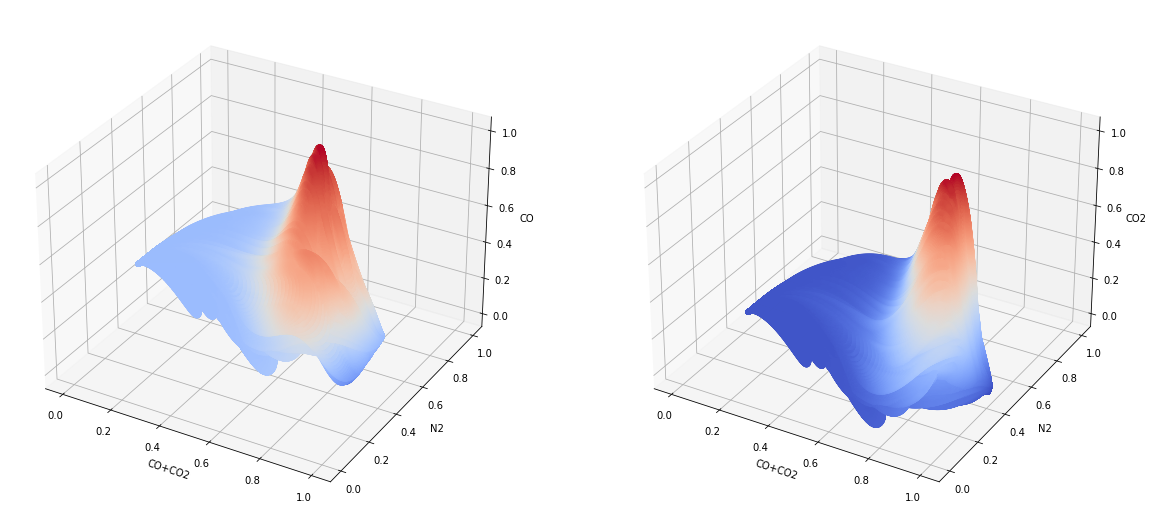

In [9]:
plot_3d_subplot(x[:, :2].cpu().data.numpy(), y.cpu().data.numpy(), f"result/3D_plot-ann2-CO_CO2-target.png")

# Model training

In [10]:
import torch.utils.data as Data

torch.manual_seed(1)    # reproducible

BATCH_SIZE = 64  # x.shape[0]

flame_dataset = Data.TensorDataset(x, y)
loader = Data.DataLoader(dataset=flame_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0, drop_last=False, )

## Define model

In [11]:
EPOCH = 100  # 500
lr = 0.01
decayRate = 0.96
token = f"epoch={EPOCH}-lr={lr:.3f}-decay={decayRate:.2f}"

In [12]:
from torch.nn.modules.loss import _Loss
import torch.nn.functional as F
from torch import Tensor

class FlameLoss(_Loss):
    __constants__ = ['reduction']

    def __init__(self, size_average=None, reduce=None, reduction: str = 'sum') -> None:
        super(FlameLoss, self).__init__(size_average, reduce, reduction)

    def forward(self, input: Tensor, target: Tensor) -> Tensor:
        return torch.sum((target + 1) * (input - target) ** 2)

Start time = 2021-11-11 22:54:35.548784
End time = 2021-11-12 10:45:40.137511
Final MSEloss=1730.3623046875


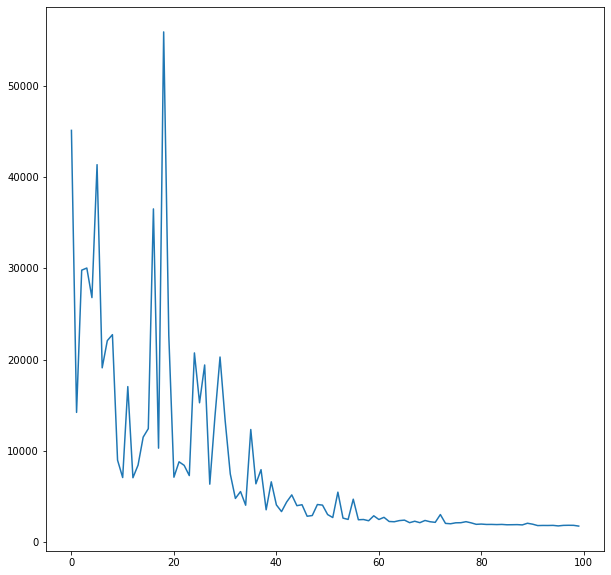

In [13]:
import imageio
from mpl_toolkits import mplot3d
import datetime
import numpy as np

net = torch.nn.Sequential(
        torch.nn.Linear(4, 160),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(160, 80),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(80, 80),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(80, 40),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(40, 2),
    ).to(device)

optimizer = torch.optim.Adam(net.parameters(), lr=lr)
lr_decay = torch.optim.lr_scheduler.ExponentialLR(optimizer, decayRate)  # lr*gamma^step

loss_values = []

print(f"Start time = {datetime.datetime.now()}")

for epoch in range(EPOCH):
    for step, (batch_x, batch_y) in enumerate(loader):
        b_x = Variable(batch_x).to(device)
        b_y = Variable(batch_y).to(device)

        y_pred = net(b_x.float())
        loss = torch.nn.MSELoss(reduction='sum')(y_pred, b_y.float())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # evaluate model:
    net.eval()
    with torch.no_grad():
        y_pred = net(x.float())
        mseLoss = torch.nn.MSELoss(reduction='sum')(y_pred, y.float())
        loss_values.append(mseLoss.cpu())

    # enable training
    net.train()
    lr_decay.step()

print(f"End time = {datetime.datetime.now()}")
print(f"Final MSEloss={mseLoss}")

fig = plt.figure(figsize=(10, 10))
plt.plot(loss_values)
plt.savefig(f"result/3D_plot-ann2-CO_CO2-train-{token}-loss={mseLoss:.6f}.png")
np.savetxt(f"result/3D_plot-ann2-CO_CO2-train-{token}-loss={mseLoss:.6f}.csv", loss_values, delimiter =", ", fmt='%s')

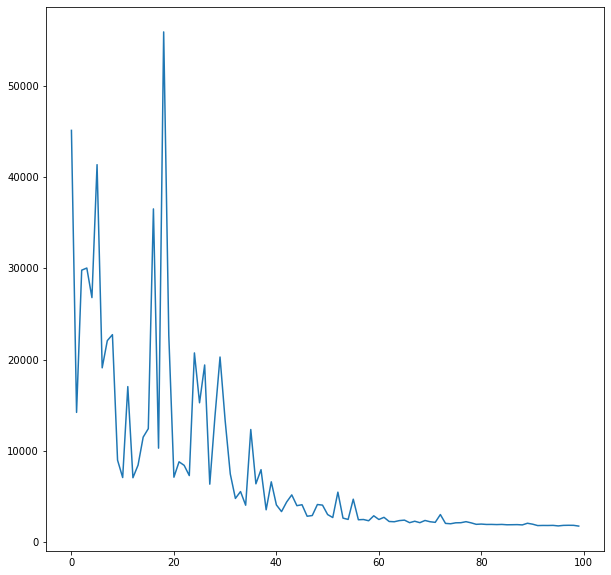

In [14]:
fig = plt.figure(figsize=(10, 10))
plt.plot(loss_values[-200:])
#print(f"loss[500]={loss_values[500]}, loss[-200]={loss_values[-200]}, loss[-1]={loss_values[-1]},")

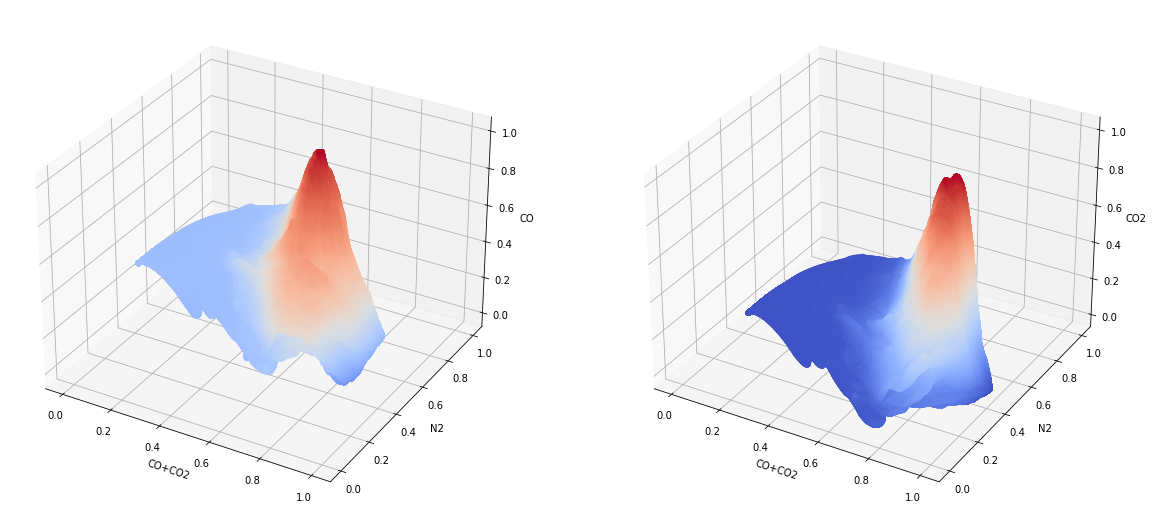

In [15]:
plot_3d_subplot(x[:, :2].cpu().data.numpy(), y_pred.cpu().data.numpy(), f"result/3D_plot-ann2-CO_CO2-{token}-loss={mseLoss:.6f}.png")

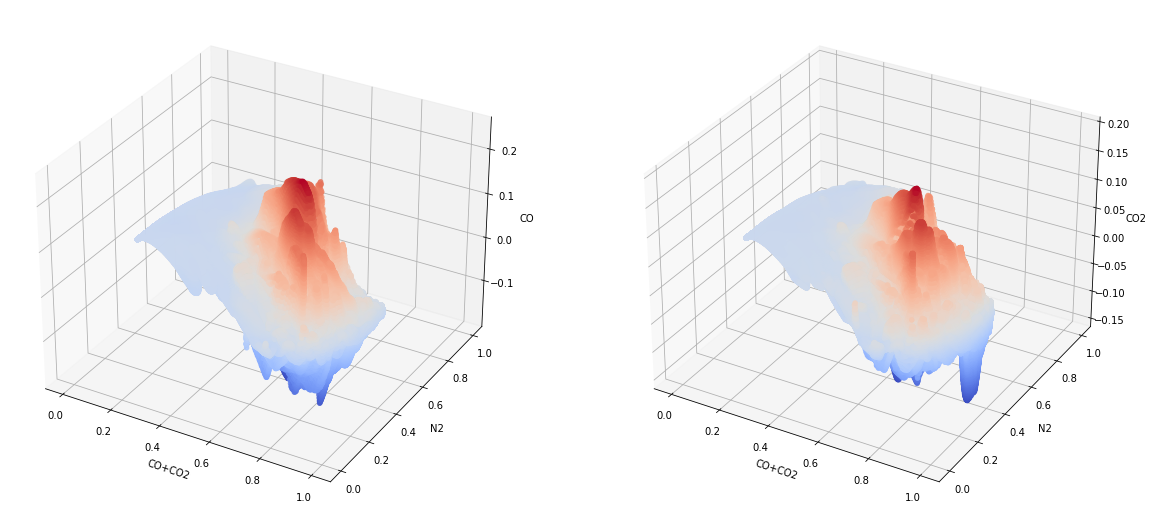

In [16]:
y_err = (y_pred-y).cpu().data.numpy()
plot_3d_subplot(x[:, :2].cpu().data.numpy(), y_err, f"result/3D_plot-ann2-CO_CO2-{token}-err-loss={mseLoss:.6f}.png")

In [17]:
CO_min_max = df_min_max.iloc[51]  # for CO
CO2_min_max = df_min_max.iloc[52]  # for CO2

std_err = np.abs(y_err).max(axis=0)

CO_real_err = std_err[0] * (CO_min_max[1] - CO_min_max[0])
CO2_real_err = std_err[1] * (CO2_min_max[1] - CO2_min_max[0])

print(f"CO maximum real err={CO_real_err}, CO2 maximum real err={CO2_real_err}")

CO maximum real err=8.751578429003351e-07, CO2 maximum real err=1.3139214507556155e-05
